# Clustering


In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator



In [2]:
data=pd.read_csv("responses.csv")

In [3]:
pd.set_option('display.max_columns', 999)
data.head()


Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0      1.0  5.0   5.0                1.0   1.0          1.0          1.0   
1      2.0  3.0   5.0                4.0   4.0          1.0          3.0   
2      5.0  3.0   5.0                3.0   4.0          1.0          4.0   
3      1.0  2.0   2.0                1.0   4.0          2.0          2.0   
4      3.0  5.0   3.0                1.0   2.0          5.0          3.0   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0          1.0          3.0          1.0     1.0             1.0    1.0   
1          1.0          4.0          4.0     2.0             1.0    1.0   
2          3.0          5.0          5.0     5.0             1.0    3.0   
3          1.0          2.0          5.0     1.0             2.0    1.0   
4          2.0          1.0          2.0     4.0             2.0    2.0   

   Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  War  \
0     5.0     4.0       2.0     5.0       4.0     4.0  1.0   
1     5.0     2.0       2.0     4.0       3.0     4.0  1.0   
2     5.0     3.0       4.0     4.0       2.0     4.0  2.0   
3     5.0     4.0       4.0     3.0       3.0     4.0  3.0   
4     5.0     4.0       4.0     5.0       2.0     3.0  3.0   

   Fantasy/Fairy tales  Animated  Documentary  Western  Action  History  \
0                  5.0       5.0          3.0      1.0     2.0      1.0   
1                  3.0       5.0          4.0      1.0     4.0      1.0   
2                  5.0       5.0          2.0      2.0     1.0      1.0   
3                  1.0       2.0          5.0      1.0     2.0      4.0   
4                  4.0       4.0          3.0      1.0     4.0      3.0   

   Psychology  Politics  Mathematics  Physics  Internet   PC  \
0         5.0       1.0          3.0      3.0       5.0  3.0   
1         3.0       4.0          5.0      2.0       4.0  4.0   
2         2.0       1.0          5.0      2.0       4.0  2.0   
3         4.0       5.0          4.0      1.0       3.0  1.0   
4         2.0       3.0          2.0      2.0       2.0  2.0   

   Economy Management  Biology  Chemistry  Reading  Geography  \
0                 5.0      3.0        3.0      3.0        3.0   
1                 5.0      1.0        1.0      4.0        4.0   
2                 4.0      1.0        1.0      5.0        2.0   
3                 2.0      3.0        3.0      5.0        4.0   
4                 2.0      3.0        3.0      5.0        2.0   

   Foreign languages  Medicine  Law  Cars  Art exhibitions  Religion  \
0                5.0       3.0  1.0   1.0              1.0       1.0   
1                5.0       1.0  2.0   2.0              2.0       1.0   
2                5.0       2.0  3.0   1.0              5.0       5.0   
3                4.0       2.0  5.0   1.0              5.0       4.0   
4                3.0       3.0  2.0   3.0              1.0       4.0   

   Countryside, outdoors  Dancing  Musical instruments  Writing  \
0                    5.0      3.0                  3.0      2.0   
1                    1.0      1.0                  1.0      1.0   
2                    5.0      5.0                  5.0      5.0   
3                    1.0      1.0                  1.0      3.0   
4                    4.0      1.0                  3.0      1.0   

   Passive sport  Active sport  Gardening  Celebrities  Shopping  \
0            1.0           5.0        5.0          1.0       4.0   
1            1.0           1.0        1.0          2.0      

In [62]:
myData=data[['Music','Slow songs or fast songs','Movies','History','Psychology','Politics','Mathematics',
'Science and technology', 'Reading', 'Foreign languages', 'Religion', 'Passive sport', 'Active sport',
 'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes' , 'Thinking ahead', 'Keeping promises', 
 'Loss of interest',  'Friends versus money', 'Funniness', 'Fake', 'Empathy', 'Compassion to animals',
  'God', 'Number of friends', 'Lying', 'Achievements', 'Happiness in life', 'Interests or hobbies', 
  'Finances', 'Age', 'Number of siblings', 'Education', 'Village - town', ]].copy()
myColumns=myData.columns
myData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Music                     1007 non-null   float64
 1   Slow songs or fast songs  1008 non-null   float64
 2   Movies                    1004 non-null   float64
 3   History                   1008 non-null   float64
 4   Psychology                1005 non-null   float64
 5   Politics                  1009 non-null   float64
 6   Mathematics               1007 non-null   float64
 7   Science and technology    1004 non-null   float64
 8   Reading                   1004 non-null   float64
 9   Foreign languages         1005 non-null   float64
 10  Religion                  1007 non-null   float64
 11  Passive sport             995 non-null    float64
 12  Active sport              1006 non-null   float64
 13  Fun with friends          1006 non-null   float64
 14  Smoking 

In [130]:
myData2=data[[ 'Biology', 'Chemistry',
'Spending on looks', 'Shopping centres',
'Celebrities', 'Shopping',
'Theatre', 'Reading',
'Mathematics', 'Physics',
'Art exhibitions', 'Theatre',
'Medicine']].copy()
myColumns=myData2.columns
myData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Biology            1004 non-null   float64
 1   Chemistry          1000 non-null   float64
 2   Spending on looks  1007 non-null   float64
 3   Shopping centres   1008 non-null   float64
 4   Celebrities        1008 non-null   float64
 5   Shopping           1008 non-null   float64
 6   Theatre            1002 non-null   float64
 7   Reading            1004 non-null   float64
 8   Mathematics        1007 non-null   float64
 9   Physics            1007 non-null   float64
 10  Art exhibitions    1004 non-null   float64
 11  Theatre            1002 non-null   float64
 12  Medicine           1005 non-null   float64
dtypes: float64(13)
memory usage: 102.7 KB


In [131]:
print(myColumns)

Index(['Biology', 'Chemistry', 'Spending on looks', 'Shopping centres',
       'Celebrities', 'Shopping', 'Theatre', 'Reading', 'Mathematics',
       'Physics', 'Art exhibitions', 'Theatre', 'Medicine'],
      dtype='object')


In [121]:
myData.dtypes

Music                       float64
Slow songs or fast songs    float64
Movies                      float64
History                     float64
Psychology                  float64
Politics                    float64
Mathematics                 float64
Science and technology      float64
Reading                     float64
Foreign languages           float64
Religion                    float64
Passive sport               float64
Active sport                float64
Fun with friends            float64
Smoking                     float64
Alcohol                     float64
Writing notes               float64
Thinking ahead              float64
Keeping promises            float64
Loss of interest            float64
Friends versus money        float64
Funniness                   float64
Fake                        float64
Empathy                     float64
Compassion to animals       float64
God                         float64
Number of friends             int64
Lying                       

In [132]:
myData2.isna().sum()

Biology               6
Chemistry            10
Spending on looks     3
Shopping centres      2
Celebrities           2
Shopping              2
Theatre               8
Reading               6
Mathematics           3
Physics               3
Art exhibitions       6
Theatre               8
Medicine              5
dtype: int64

<AxesSubplot:>

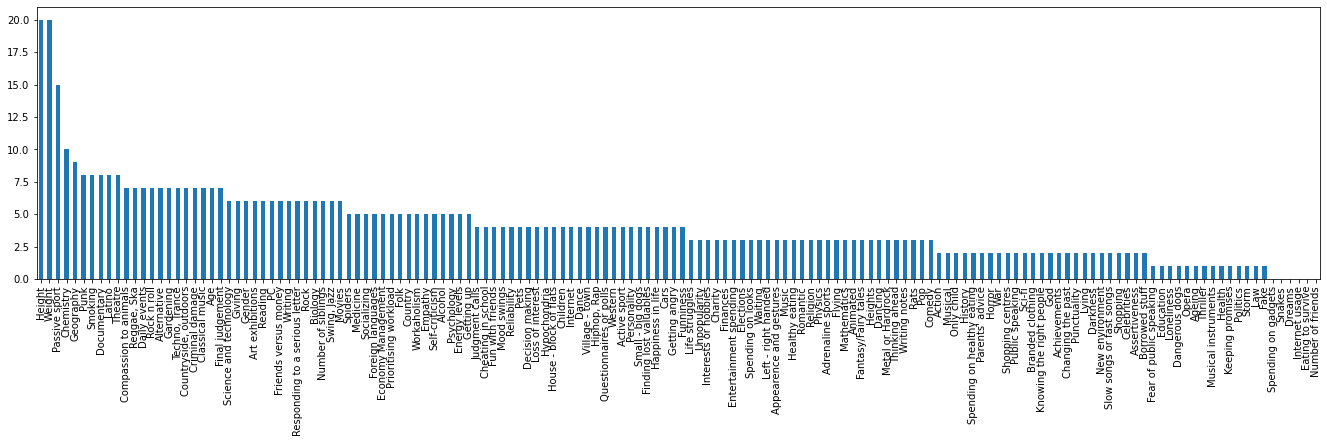

In [13]:
nulls = data.isnull().sum().sort_values(ascending=False)
nulls.plot(kind='bar', figsize=(23, 5))

In [133]:
myData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Biology            1004 non-null   float64
 1   Chemistry          1000 non-null   float64
 2   Spending on looks  1007 non-null   float64
 3   Shopping centres   1008 non-null   float64
 4   Celebrities        1008 non-null   float64
 5   Shopping           1008 non-null   float64
 6   Theatre            1002 non-null   float64
 7   Reading            1004 non-null   float64
 8   Mathematics        1007 non-null   float64
 9   Physics            1007 non-null   float64
 10  Art exhibitions    1004 non-null   float64
 11  Theatre            1002 non-null   float64
 12  Medicine           1005 non-null   float64
dtypes: float64(13)
memory usage: 102.7 KB


In [67]:
# saving the dataframe
myData.to_csv('myData.csv')

myData.head()

Music  Slow songs or fast songs  Movies  History  Psychology  Politics  \
0    5.0                       3.0     5.0      1.0         5.0       1.0   
1    4.0                       4.0     5.0      1.0         3.0       4.0   
2    5.0                       5.0     5.0      1.0         2.0       1.0   
3    5.0                       3.0     5.0      4.0         4.0       5.0   
4    5.0                       3.0     5.0      3.0         2.0       3.0   

   Mathematics  Science and technology  Reading  Foreign languages  Religion  \
0          3.0                     4.0      3.0                5.0       1.0   
1          5.0                     3.0      4.0                5.0       1.0   
2          5.0                     2.0      5.0                5.0       5.0   
3          4.0                     3.0      5.0                4.0       4.0   
4          2.0                     3.0      5.0                3.0       4.0   

   Passive sport  Active sport  Fun with friends        Smoking  \
0            1.0           5.0               5.0   never smoked   
1            1.0           1.0               4.0   never smoked   
2            5.0           2.0               5.0  tried smoking   
3            1.0           1.0               2.0  former smoker   
4            3.0           1.0               4.0  tried smoking   

          Alcohol  Writing notes  Thinking ahead  Keeping promises  \
0     drink a lot            5.0             2.0               4.0   
1     drink a lot            4.0             4.0               4.0   
2     drink a lot            5.0             5.0               5.0   
3     drink a lot            4.0             3.0               4.0   
4  social drinker            2.0             5.0               4.0   

   Loss of interest  Friends versus money  Funniness  Fake  Empathy  \
0               1.0                   3.0        5.0   1.0      3.0   
1               3.0                   4.0        3.0   2.0      2.0   
2               1.0                   5.0        2.0   4.0      5.0   
3               5.0                   2.0        1.0   1.0      3.0   
4               2.0                   3.0        3.0   2.0      3.0   

   Compassion to animals  God  Number of friends  \
0                    5.0  1.0                  3   
1                    4.0  1.0                  3   
2                    4.0  5.0                  3   
3                    2.0  4.0                  1   
4                    3.0  5.0                  3   

                           Lying  Achievements  Happiness in life  \
0                          never           4.0                4.0   
1                      sometimes           2.0                4.0   
2                      sometimes           3.0                4.0   
3  only to avoid hurting someone           3.0                2.0   
4          everytime it suits me           3.0                3.0   

   Interests or hobbies  Finances   Age  Number of siblings  \
0                   3.0       3.0  20.0                 1.0   
1                   3.0       3.0  19.0                 2.0   
2                   5.0       2.0  20.0                 2.0   
3                   NaN       2.0  22.0                 1.0   
4                   3.0       4.0  20.0                 1.0   

                 Education Village - town  
0  college/bachelor degree        village  
1  college/bachelor degree           city  
2         secondary school           city  
3  college/bachelor degree           city  
4         secondary school        village

In [134]:
columnsList = myData2.columns[myData2.isna().any()].tolist()
print(columnsList)

['Biology', 'Chemistry', 'Spending on looks', 'Shopping centres', 'Celebrities', 'Shopping', 'Theatre', 'Reading', 'Mathematics', 'Physics', 'Art exhibitions', 'Theatre', 'Medicine']


### Convert all values to numerical values.

In [69]:
# 5 objects
print("Alcohol: "+str(myData['Alcohol'].unique()))
print("Smoking: "+str(myData['Smoking'].unique()))
print("Lying: "+str(myData['Lying'].unique()))
print("Education: "+str(myData['Education'].unique()))
print("Village - Town: "+str(myData['Village - town'].unique()))

Alcohol: ['drink a lot' 'social drinker' 'never' nan]
Smoking: ['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan]
Lying: ['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me' nan]
Education: ['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
Village - Town: ['village' 'city' nan]


In [70]:
myData['Alcohol'].replace(['never', 'social drinker', 'drink a lot'], [0, 3, 5],inplace=True)
myData['Smoking'].replace(['never smoked', 'tried smoking', 'current smoker', 'former smoker'], [0, 3, 4, 5],inplace=True)
myData['Lying'].replace(['never', 'sometimes', 'only to avoid hurting someone', 'everytime it suits me'], [0, 3, 4, 5],inplace=True)
myData['Education'].replace(['currently a primary school pupil', 'primary school', 'secondary school', 'college/bachelor degree', 'masters degree', 'doctorate degree'], [0, 1, 2, 3, 4, 5],inplace=True)
myData['Village - town'].replace(['village', 'city'], [5, 0],inplace=True)

### Fill missing values with median, categorical data, median is okay

In [135]:
myData2.head()

Biology  Chemistry  Spending on looks  Shopping centres  Celebrities  \
0      3.0        3.0                3.0               4.0          1.0   
1      1.0        1.0                2.0               4.0          2.0   
2      1.0        1.0                3.0               4.0          1.0   
3      3.0        3.0                4.0               4.0          2.0   
4      3.0        3.0                3.0               3.0          3.0   

   Shopping  Theatre  Reading  Mathematics  Physics  Art exhibitions  Theatre  \
0       4.0      2.0      3.0          3.0      3.0              1.0      2.0   
1       3.0      2.0      4.0          5.0      2.0              2.0      2.0   
2       4.0      5.0      5.0          5.0      2.0              5.0      5.0   
3       4.0      1.0      5.0          4.0      1.0              5.0      1.0   
4       3.0      2.0      5.0          2.0      2.0              1.0      2.0   

   Medicine  
0       3.0  
1       1.0  
2       2.0  
3       2.0  
4       3.0

In [139]:
myData2.isna().sum()

Biology               6
Chemistry            10
Spending on looks     3
Shopping centres      2
Celebrities           2
Shopping              2
Theatre               8
Reading               6
Mathematics           3
Physics               3
Art exhibitions       6
Theatre               8
Medicine              5
dtype: int64

<AxesSubplot:ylabel='Music'>

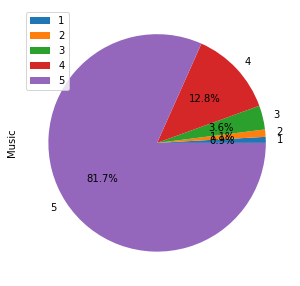

In [20]:
type_counts = myData['Music'].value_counts()
df2 = pd.DataFrame({'Music': type_counts}, 
                     index = [1,2,3,4,5])
df2.plot.pie(y='Music', figsize=(5,5), autopct='%1.1f%%')

In [141]:
myData2.fillna(myData2.median(),inplace=True)
myData2.isna().sum()

Biology              0
Chemistry            0
Spending on looks    0
Shopping centres     0
Celebrities          0
Shopping             0
Theatre              0
Reading              0
Mathematics          0
Physics              0
Art exhibitions      0
Theatre              0
Medicine             0
dtype: int64

In [142]:
myData2.describe()

Biology    Chemistry  Spending on looks  Shopping centres  \
count  1010.000000  1010.000000        1010.000000       1010.000000   
mean      2.661386     2.163366           3.105941          3.233663   
std       1.380953     1.371537           1.203589          1.321791   
min       1.000000     1.000000           1.000000          1.000000   
25%       2.000000     1.000000           2.000000          2.000000   
50%       2.000000     2.000000           3.000000          3.000000   
75%       4.000000     3.000000           4.000000          4.000000   
max       5.000000     5.000000           5.000000          5.000000   

       Celebrities     Shopping      Theatre      Reading  Mathematics  \
count  1010.000000  1010.000000  1010.000000  1010.000000  1010.000000   
mean      2.361386     3.276238     3.024752     3.158416     2.333663   
std       1.269094     1.284940     1.320112     1.491520     1.350607   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     2.000000     2.000000     2.000000     1.000000   
50%       2.000000     3.000000     3.000000     3.000000     2.000000   
75%       3.000000     4.000000     4.000000     5.000000     3.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

           Physics  Art exhibitions      Theatre     Medicine  
count  1010.000000      1010.000000  1010.000000  1010.000000  
mean      2.064356         2.586139     3.024752     2.513861  
std       1.225278         1.318845     1.320112     1.377400  
min       1.000000         1.000000     1.000000     1.000000  
25%       1.000000         1.000000     2.000000     1.000000  
50%       2.000000         2.000000     3.000000     2.000000  
75%       3.000000         4.000000     4.000000     3.000000  
max       5.000000         5.000000     5.000000     5.000000

In [143]:
columns=pd.read_csv('columns.csv')
columns.loc[columns['short'].isin(myColumns)].reset_index(drop=True)

original              short
0                                Mathematics        Mathematics
1                                    Physics            Physics
2                                    Biology            Biology
3                                  Chemistry          Chemistry
4                             Poetry reading            Reading
5                                   Medicine           Medicine
6                                        Art    Art exhibitions
7                        Celebrity lifestyle        Celebrities
8                                   Shopping           Shopping
9                                    Theatre            Theatre
10  I enjoy going to large shopping centres.   Shopping centres
11  I spend a lot of money on my appearance.  Spending on looks

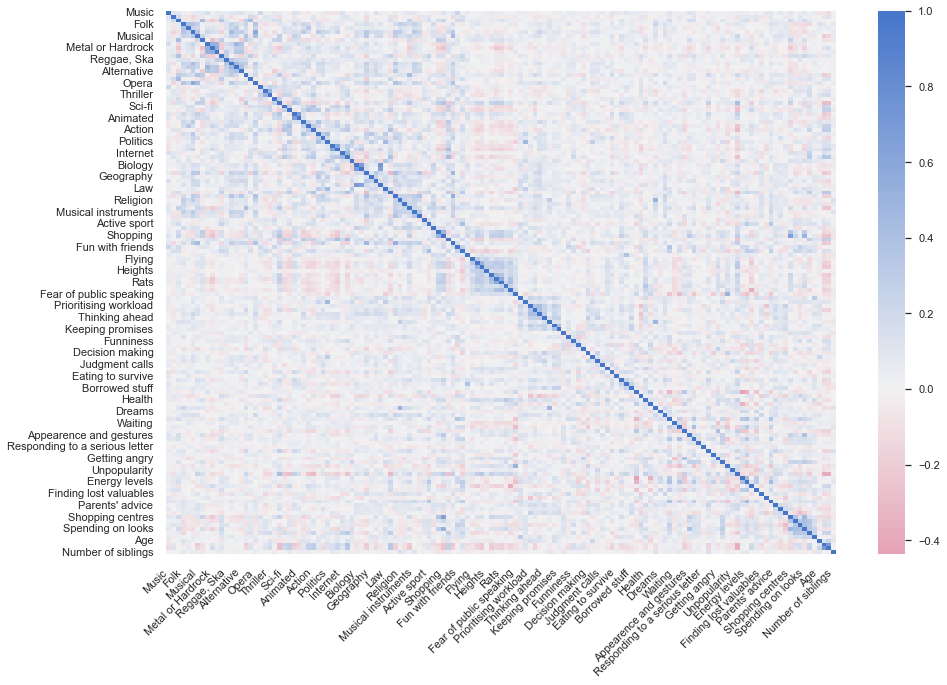

In [99]:
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.heatmap(data.corr(), center=0.00, cmap=sns.diverging_palette(0, 255,as_cmap=True))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [100]:
corr_matrix = data.corr()

# Sort the correlation matrix in descending order
sorted_corr_matrix = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove duplicates
sorted_corr_matrix = sorted_corr_matrix[sorted_corr_matrix.index.get_level_values(0) != sorted_corr_matrix.index.get_level_values(1)]

# Show the sorted list of correlations
sorted_corr_matrix.head(50)


Medicine                 Biology                    0.715551
Biology                  Medicine                   0.715551
Height                   Weight                     0.697696
Weight                   Height                     0.697696
Biology                  Chemistry                  0.689859
Chemistry                Biology                    0.689859
Fantasy/Fairy tales      Animated                   0.674675
Animated                 Fantasy/Fairy tales        0.674675
Shopping centres         Shopping                   0.651585
Shopping                 Shopping centres           0.651585
Chemistry                Medicine                   0.626713
Medicine                 Chemistry                  0.626713
Physics                  Mathematics                0.595992
Mathematics              Physics                    0.595992
Opera                    Classical music            0.595905
Classical music          Opera                      0.595905
Rats                    

In [26]:
# Calculate the correlation matrix
corr_matrix = myData.corr()

# Loop over each column in the correlation matrix
for col in corr_matrix.columns:
    print("Most correlated features with", col, ":")
    # Get the 5 most correlated features with the current column
    most_correlated = corr_matrix[col].sort_values(ascending=False).head(6).index[1:]
    print(most_correlated)
    print("\n")

Most correlated features with Music :
Index(['Movies', 'Foreign languages', 'Empathy', 'Slow songs or fast songs',
       'Interests or hobbies'],
      dtype='object')


Most correlated features with Slow songs or fast songs :
Index(['Active sport', 'Interests or hobbies', 'Music', 'Socializing',
       'Smoking'],
      dtype='object')


Most correlated features with Movies :
Index(['Music', 'Foreign languages', 'Pets', 'Getting up', 'Reading'], dtype='object')


Most correlated features with History :
Index(['Politics', 'Reading', 'Interests or hobbies', 'Foreign languages',
       'Science and technology'],
      dtype='object')


Most correlated features with Politics :
Index(['History', 'Science and technology', 'Foreign languages', 'Mathematics',
       'Smoking'],
      dtype='object')


Most correlated features with Mathematics :
Index(['Science and technology', 'Finances', 'Keeping promises', 'Politics',
       'Number of siblings'],
      dtype='object')


Most correlated fe

In [76]:
corr_matrix = myData.corr()

# Get the sorted list of correlation between features
sorted_corr_matrix = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove duplicates
sorted_corr_matrix = sorted_corr_matrix[sorted_corr_matrix.index.get_level_values(0) != sorted_corr_matrix.index.get_level_values(1)]

# Get the 15 most correlated feature pairs
most_correlated_15 = sorted_corr_matrix.head(15)

# Get the combination of the 15 most correlated features
most_correlated_features = set()
for index, value in most_correlated_15.iteritems():
    feature1, feature2 = index
    most_correlated_features.add(feature1)
    most_correlated_features.add(feature2)

# Show the combination of the 15 most correlated features
print(most_correlated_features)

{'Active sport', 'Smoking', 'Alcohol', 'Education', 'Age', 'Happiness in life', 'Politics', 'Religion', 'Interests or hobbies', 'God', 'History', 'Fun with friends', 'Number of friends'}


In [77]:
myData.columns

Index(['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology',
       'Politics', 'Mathematics', 'Science and technology', 'Reading',
       'Foreign languages', 'Religion', 'Passive sport', 'Active sport',
       'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes',
       'Thinking ahead', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Empathy',
       'Compassion to animals', 'God', 'Number of friends', 'Lying',
       'Achievements', 'Happiness in life', 'Interests or hobbies', 'Finances',
       'Age', 'Number of siblings', 'Education', 'Village - town'],
      dtype='object')

In [144]:
newData=myData2.copy()


In [96]:
newData = myData[['Thinking ahead', 'Fake', 'Lying', 'Happiness in life', 'Education', 'Psychology', 'Village - town', 'History']]

In [30]:
newData = myData[['God', 'Alcohol', 'Age', 'Education', 'Loneliness', 'Reading', 'Socializing', 'Mood swings']]

In [165]:
newData = myData[['God', 'Religion', 'Age', 'Education', 'History', 'Politics', 'Number of friends', 'Fun with friends']]

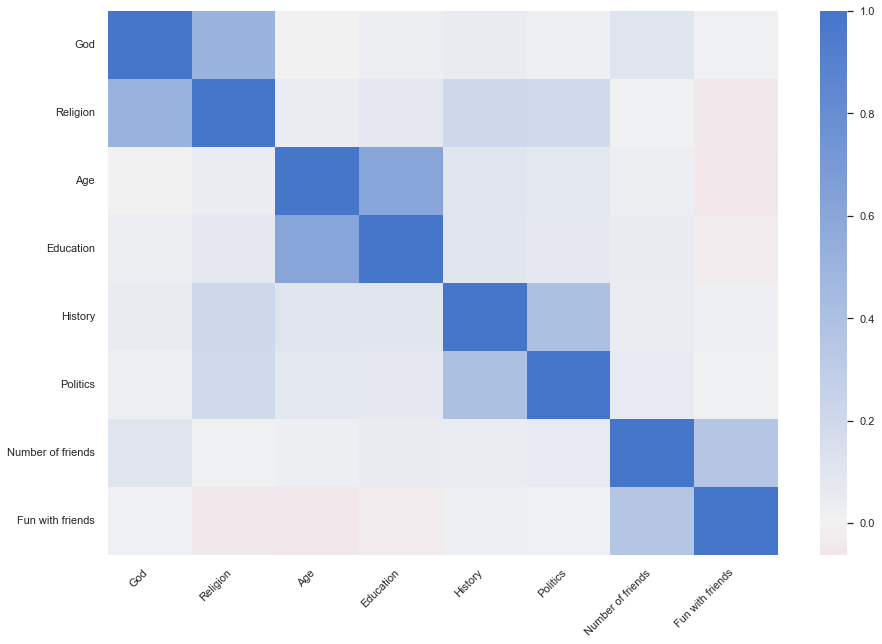

In [166]:
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.heatmap(newData.corr(), center=0.00, cmap=sns.diverging_palette(0, 255,as_cmap=True))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [146]:
corr_matrix = newData.corr()

# Sort the correlation matrix in descending order
sorted_corr_matrix = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove duplicates
sorted_corr_matrix = sorted_corr_matrix[sorted_corr_matrix.index.get_level_values(0) != sorted_corr_matrix.index.get_level_values(1)]

# Show the sorted list of correlations
sorted_corr_matrix.head(30)

Biology            Medicine             0.702746
Medicine           Biology              0.702746
Biology            Chemistry            0.677562
Chemistry          Biology              0.677562
Shopping centres   Shopping             0.650524
Shopping           Shopping centres     0.650524
Chemistry          Medicine             0.621256
Medicine           Chemistry            0.621256
Physics            Mathematics          0.593086
Mathematics        Physics              0.593086
Theatre            Art exhibitions      0.533017
Art exhibitions    Theatre              0.533017
Theatre            Art exhibitions      0.533017
Art exhibitions    Theatre              0.533017
Spending on looks  Shopping             0.510390
Shopping           Spending on looks    0.510390
Shopping centres   Spending on looks    0.487785
Spending on looks  Shopping centres     0.487785
Celebrities        Shopping             0.485098
Shopping           Celebrities          0.485098
Reading            T

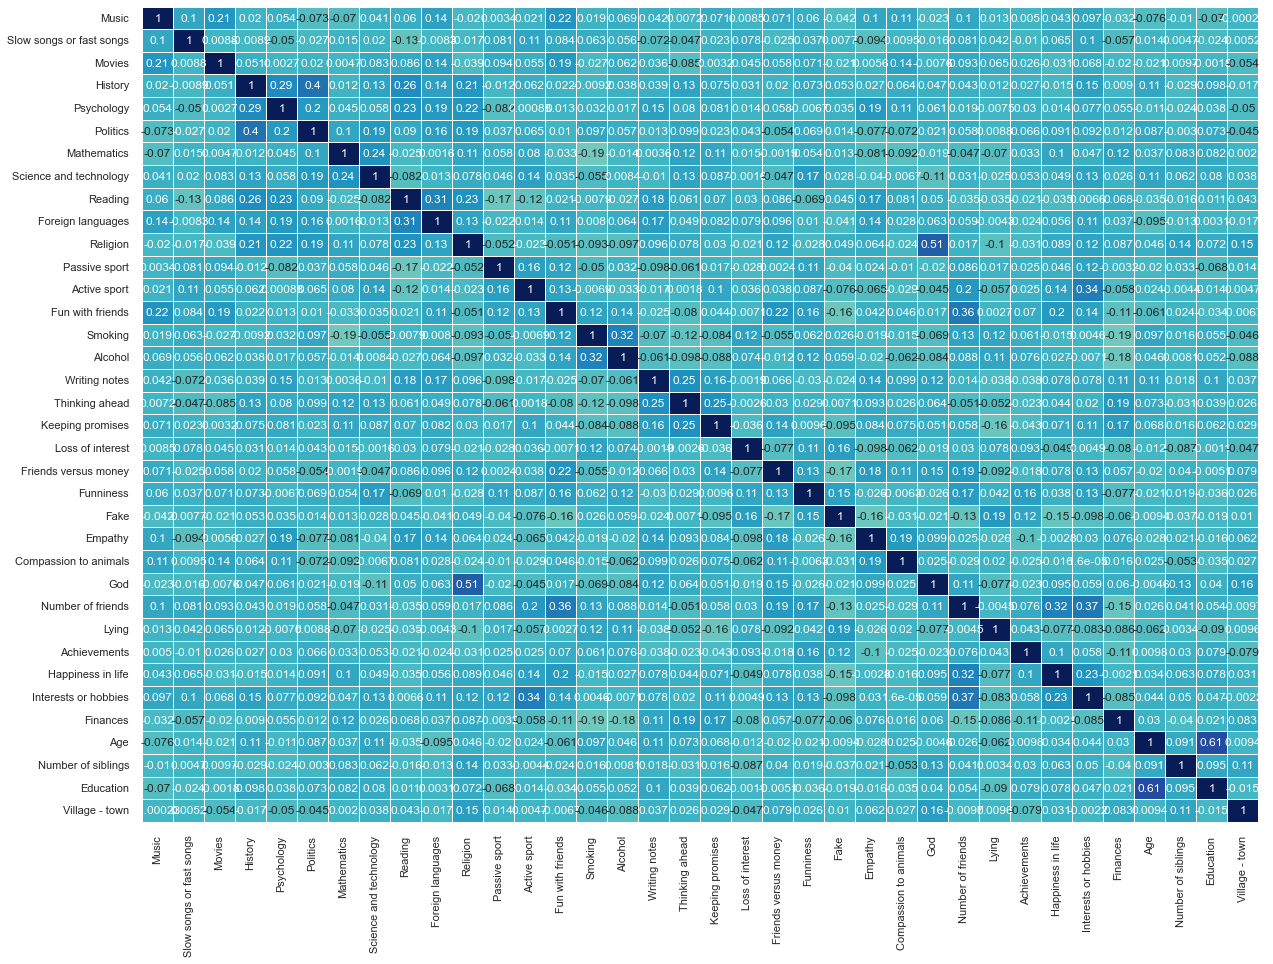

In [80]:
plt.figure(figsize=(20,15))
sns.heatmap(myData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [29]:
myData=myData.drop(columns=['God', 'Village - town'])

<AxesSubplot:xlabel='Smoking', ylabel='Finances'>

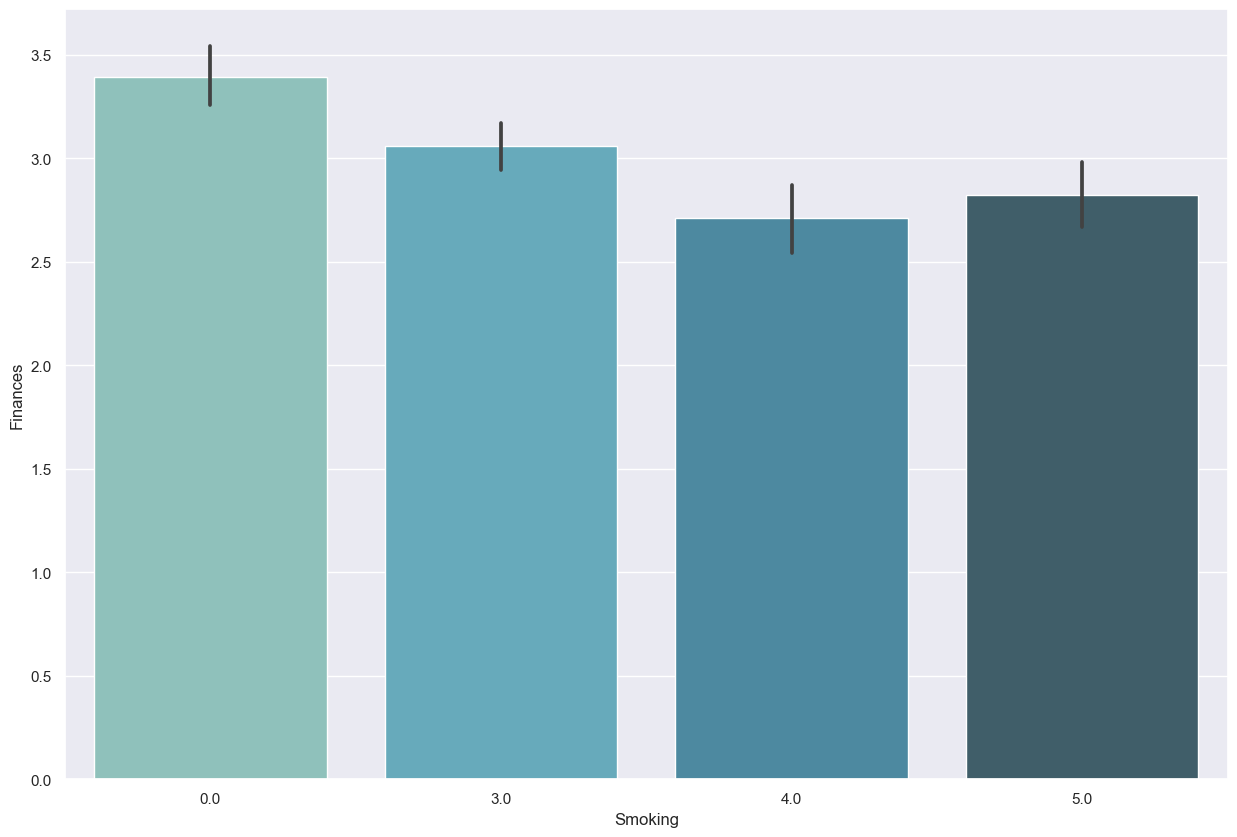

In [31]:
sns.barplot(x=myData['Smoking'], y=myData['Finances'], palette="GnBu_d")


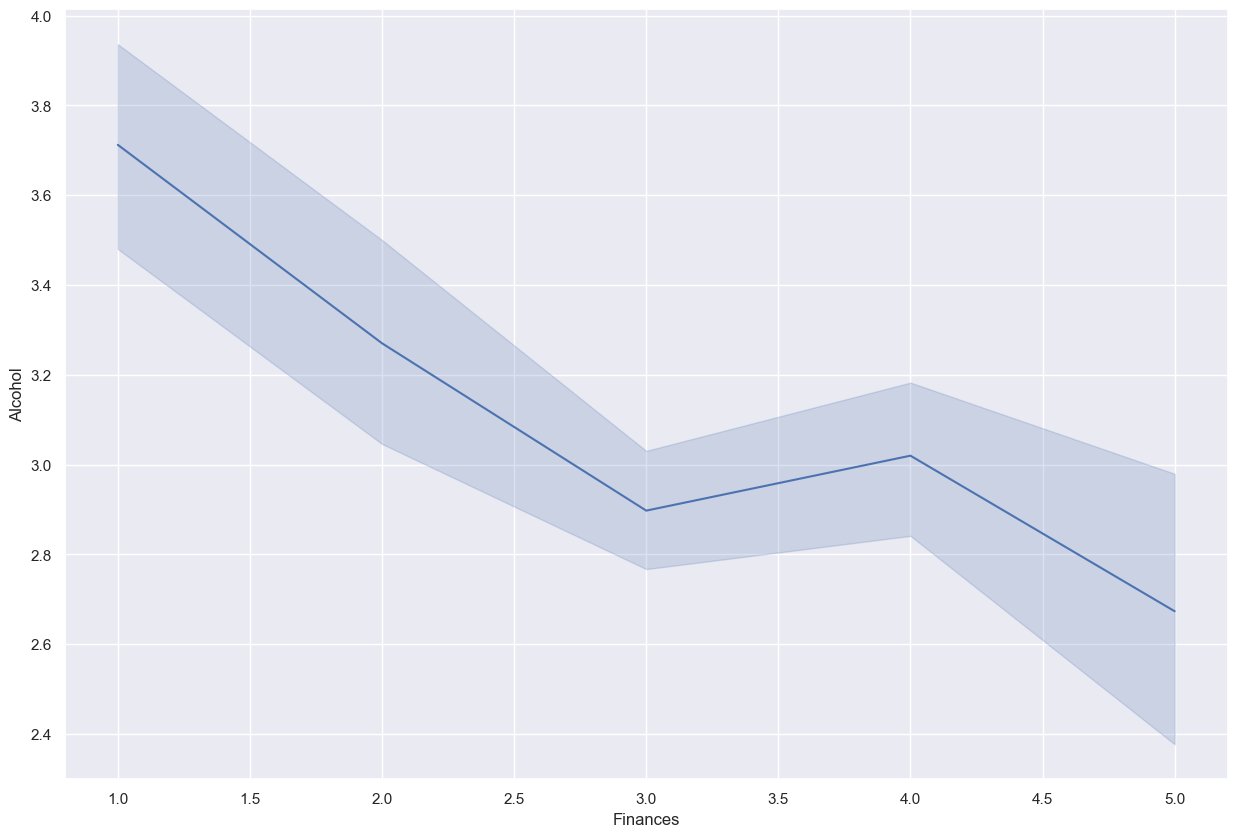

In [35]:
sns.lineplot(x = myData['Finances'], y=myData['Alcohol'], palette="GnBu_d");


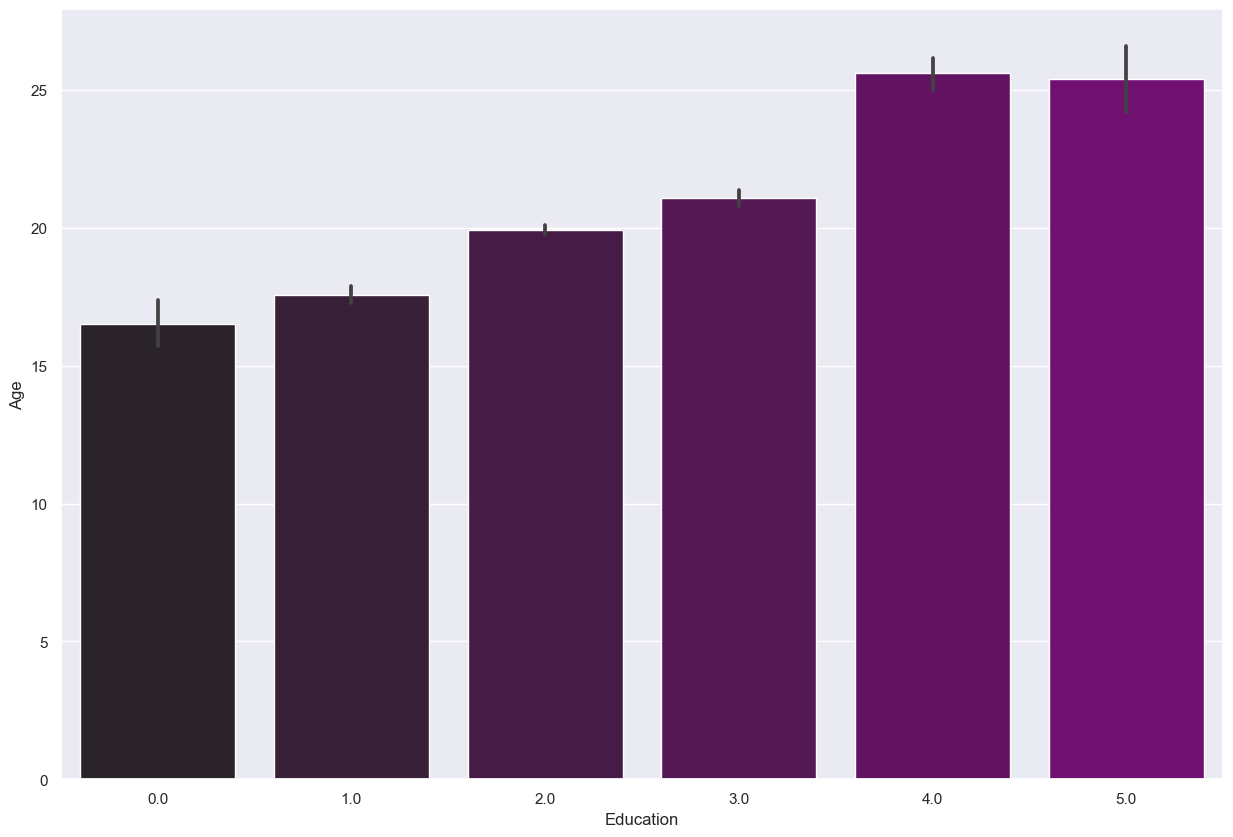

In [15]:
sns.barplot(x=myData['Education'], y=myData['Age'], palette=sns.dark_palette("purple"));


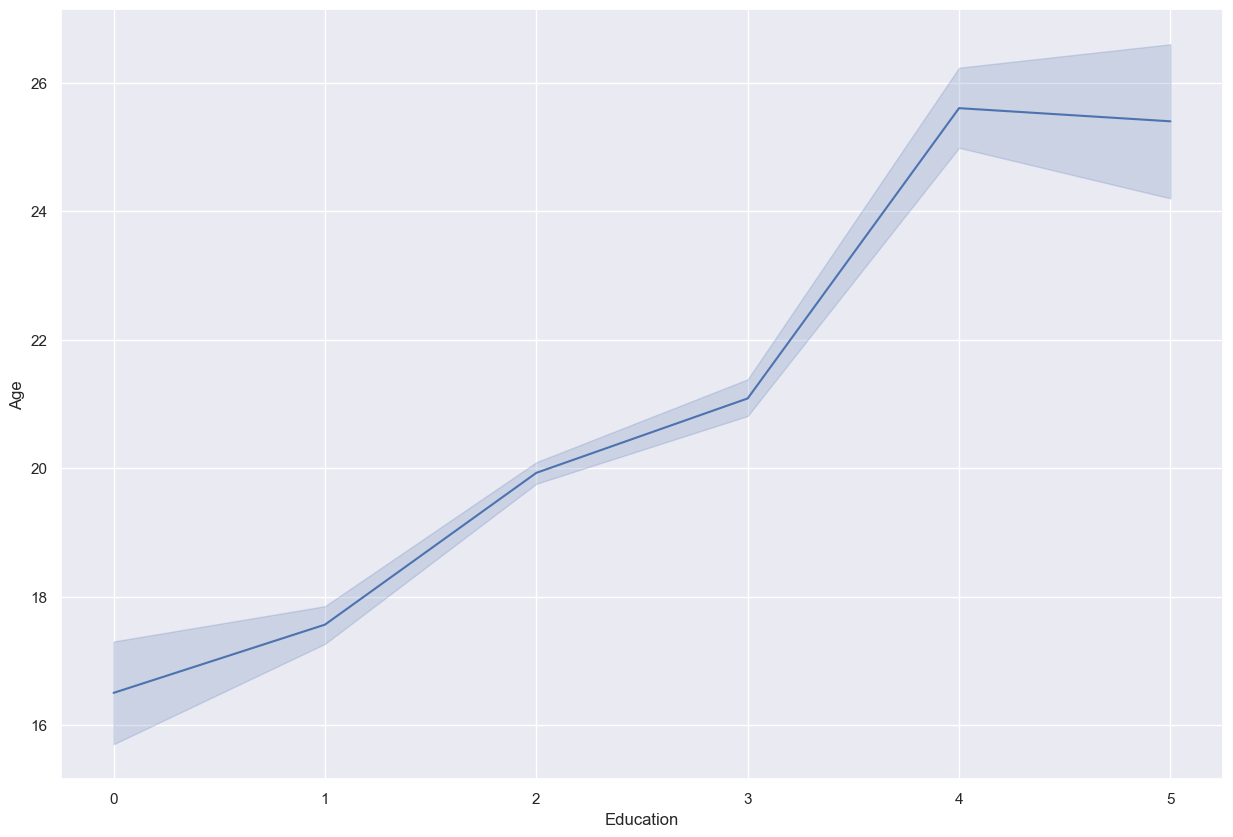

In [16]:
sns.lineplot(x=myData['Education'], y=myData['Age'], palette=sns.dark_palette("purple"));

## Clustering

### Helper functions

In [81]:
def printClusters(dataset_, labels_, indices_=[0, 1, 2]):
    plt.figure(figsize = (12, 12))
    ax = plt.axes(projection='3d')
    for cluster in set(labels_):
        cluster_mask = [elem == cluster for elem in labels_]
        
        zdata = dataset_.iloc[cluster_mask, indices_[0]]
        xdata = dataset_.iloc[cluster_mask, indices_[1]]
        ydata = dataset_.iloc[cluster_mask, indices_[2]]
        ax.scatter3D(xdata, ydata, zdata)
        
        ax.set_xlabel(dataset_.columns[indices_[0]])
        ax.set_ylabel(dataset_.columns[indices_[1]])
        ax.set_zlabel(dataset_.columns[indices_[2]])

In [82]:
myData.head()

Music  Slow songs or fast songs  Movies  History  Psychology  Politics  \
0    5.0                       3.0     5.0      1.0         5.0       1.0   
1    4.0                       4.0     5.0      1.0         3.0       4.0   
2    5.0                       5.0     5.0      1.0         2.0       1.0   
3    5.0                       3.0     5.0      4.0         4.0       5.0   
4    5.0                       3.0     5.0      3.0         2.0       3.0   

   Mathematics  Science and technology  Reading  Foreign languages  Religion  \
0          3.0                     4.0      3.0                5.0       1.0   
1          5.0                     3.0      4.0                5.0       1.0   
2          5.0                     2.0      5.0                5.0       5.0   
3          4.0                     3.0      5.0                4.0       4.0   
4          2.0                     3.0      5.0                3.0       4.0   

   Passive sport  Active sport  Fun with friends  Smoking  Alcohol  \
0            1.0           5.0               5.0      0.0      5.0   
1            1.0           1.0               4.0      0.0      5.0   
2            5.0           2.0               5.0      3.0      5.0   
3            1.0           1.0               2.0      5.0      5.0   
4            3.0           1.0               4.0      3.0      3.0   

   Writing notes  Thinking ahead  Keeping promises  Loss of interest  \
0            5.0             2.0               4.0               1.0   
1            4.0             4.0               4.0               3.0   
2            5.0             5.0               5.0               1.0   
3            4.0             3.0               4.0               5.0   
4            2.0             5.0               4.0               2.0   

   Friends versus money  Funniness  Fake  Empathy  Compassion to animals  God  \
0                   3.0        5.0   1.0      3.0                    5.0  1.0   
1                   4.0        3.0   2.0      2.0                    4.0  1.0   
2                   5.0        2.0   4.0      5.0                    4.0  5.0   
3                   2.0        1.0   1.0      3.0                    2.0  4.0   
4                   3.0        3.0   2.0      3.0                    3.0  5.0   

   Number of friends  Lying  Achievements  Happiness in life  \
0                  3    0.0           4.0                4.0   
1                  3    3.0           2.0                4.0   
2                  3    3.0           3.0                4.0   
3                  1    4.0           3.0                2.0   
4                  3    5.0           3.0                3.0   

   Interests or hobbies  Finances   Age  Number of siblings  Education  \
0                   3.0       3.0  20.0                 1.0        3.0   
1                   3.0       3.0  19.0                 2.0        3.0   
2                   5.0       2.0  20.0                 2.0        2.0   
3                   4.0       2.0  22.0                 1.0        3.0   
4                   3.0       4.0  20.0                 1.0        2.0   

   Village - town  
0             5.0  
1             0.0  
2             0.0  
3             0.0  
4             5.0

### K-means clustering

### myData K-means

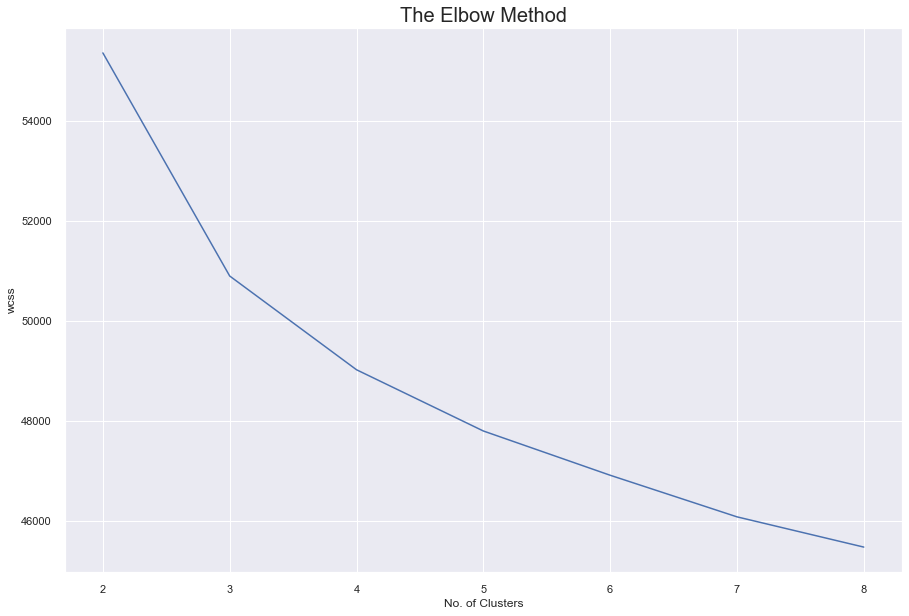

In [83]:
x=myData
wcss = []
for i in range(2, 9):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, n_init = 10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()



### newData K-means

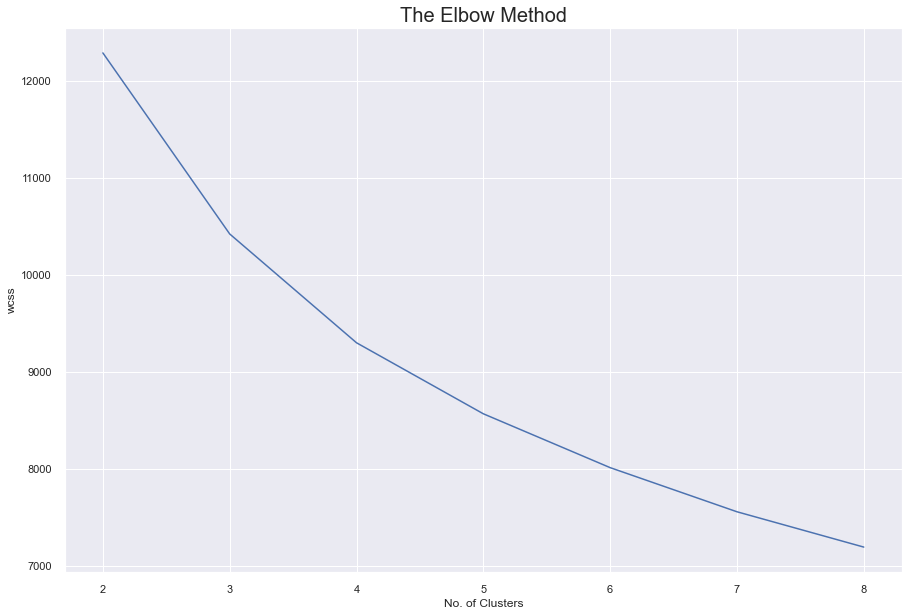

In [167]:
x=newData
wcss = []
for i in range(2, 9):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, n_init = 10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [168]:
# znaci sutra radim sistem ili brisem sve pajtone zauvek ne mogu milion verzija istih programa vise
kl = KneeLocator( range(2, 9), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [169]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30)
km.fit(x)
y_means=km.predict(x)

### Calculating Silhouette score

In [170]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette score: ", silhouette_score(x,y_means))
print("Davies-Bouldin score: ", davies_bouldin_score(x,y_means))


Silhouette score:  0.172536894994965
Davies-Bouldin score:  1.584955239209215


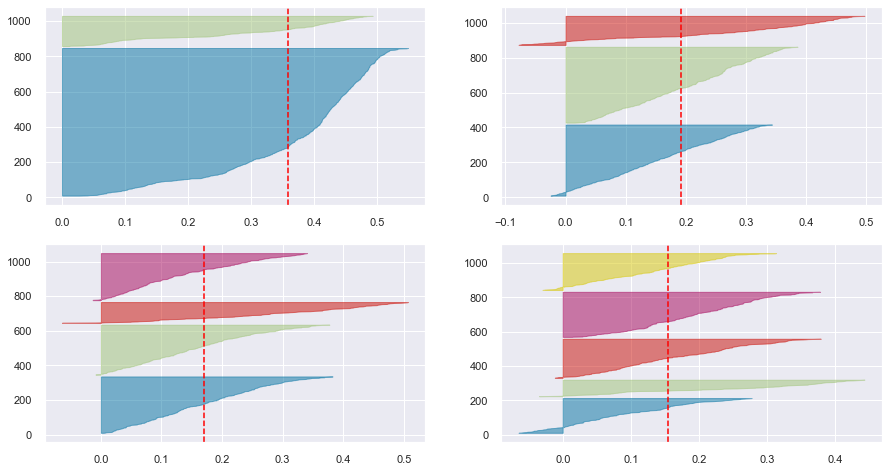

In [171]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

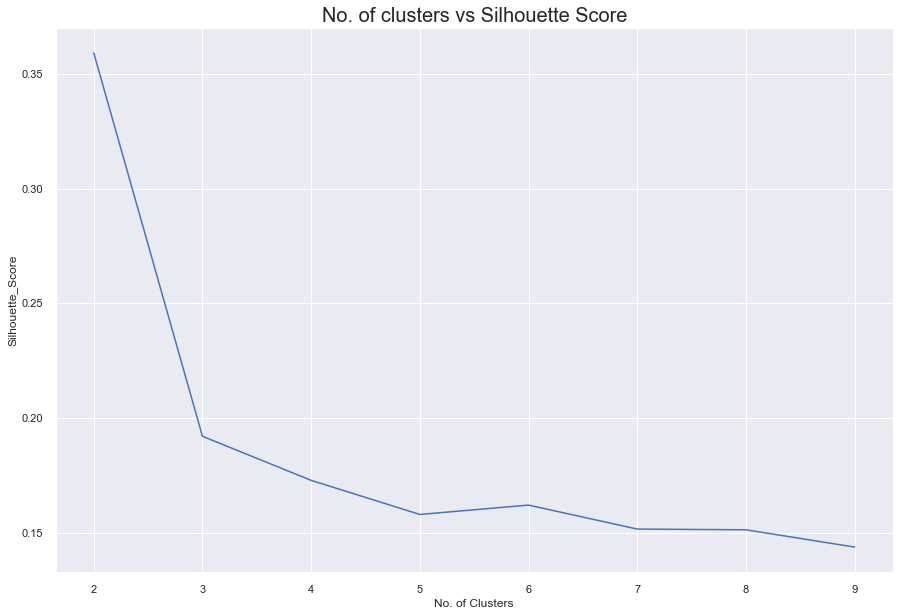

In [172]:
#x=myData[['Science and technology', 'Religion', 'Fun with friends']]
x=newData

scaler=StandardScaler()
scaler.fit(x)
wcss = []
#x=scaler.transform(x)
for i in range(2, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10,random_state=0)
    km.fit(x)
    y_means=km.predict(x)
    s=silhouette_score(x,y_means)
    wcss.append(s)
plt.plot(range(2, 10), wcss)
plt.title('No. of clusters vs Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_Score')
plt.show()

In [173]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30,random_state=2)
x=myData
km.fit(x)
y_means=km.predict(x)
cent = km.cluster_centers_
myData['y_means']=y_means
myData.groupby('y_means').mean()
kmeans=pd.DataFrame(y_means)

In [174]:
import plotly.express as px

In [176]:
myData.head()
fig = px.scatter_3d(myData, x=myData.columns[5], y=myData.columns[10], z=myData.columns[15], color=y_means, symbol=y_means, height=700)
fig.show() 

C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_23260\2349083183.py:8: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



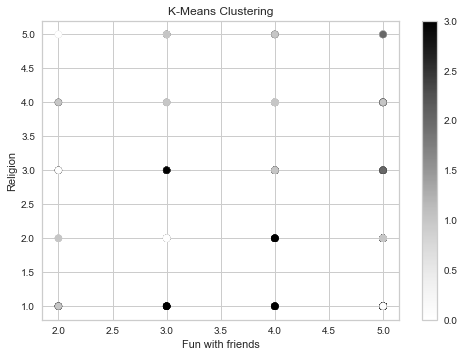

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(newData['Fun with friends'],newData['Religion'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Fun with friends')
ax.set_ylabel('Religion')
plt.colorbar(scatter)

In [178]:
newData.head()

God  Religion   Age  Education  History  Politics  Number of friends  \
0  1.0       1.0  20.0        3.0      1.0       1.0                  3   
1  1.0       1.0  19.0        3.0      1.0       4.0                  3   
2  5.0       5.0  20.0        2.0      1.0       1.0                  3   
3  4.0       4.0  22.0        3.0      4.0       5.0                  1   
4  5.0       4.0  20.0        2.0      3.0       3.0                  3   

   Fun with friends  
0               5.0  
1               4.0  
2               5.0  
3               2.0  
4               4.0

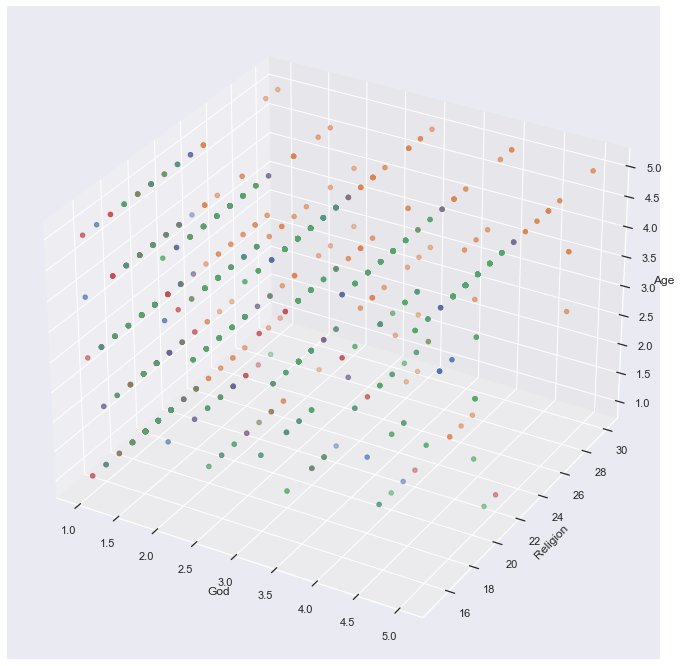

In [177]:
printClusters(newData, y_means)# [0, 3, 6])
fig = px.scatter_3d(newData, x=newData.columns[0], y=newData.columns[2], z=newData.columns[3], color=y_means, symbol=y_means, height=700)
fig.show() 


In [172]:
sns.pairplot(x)

KeyboardInterrupt: 

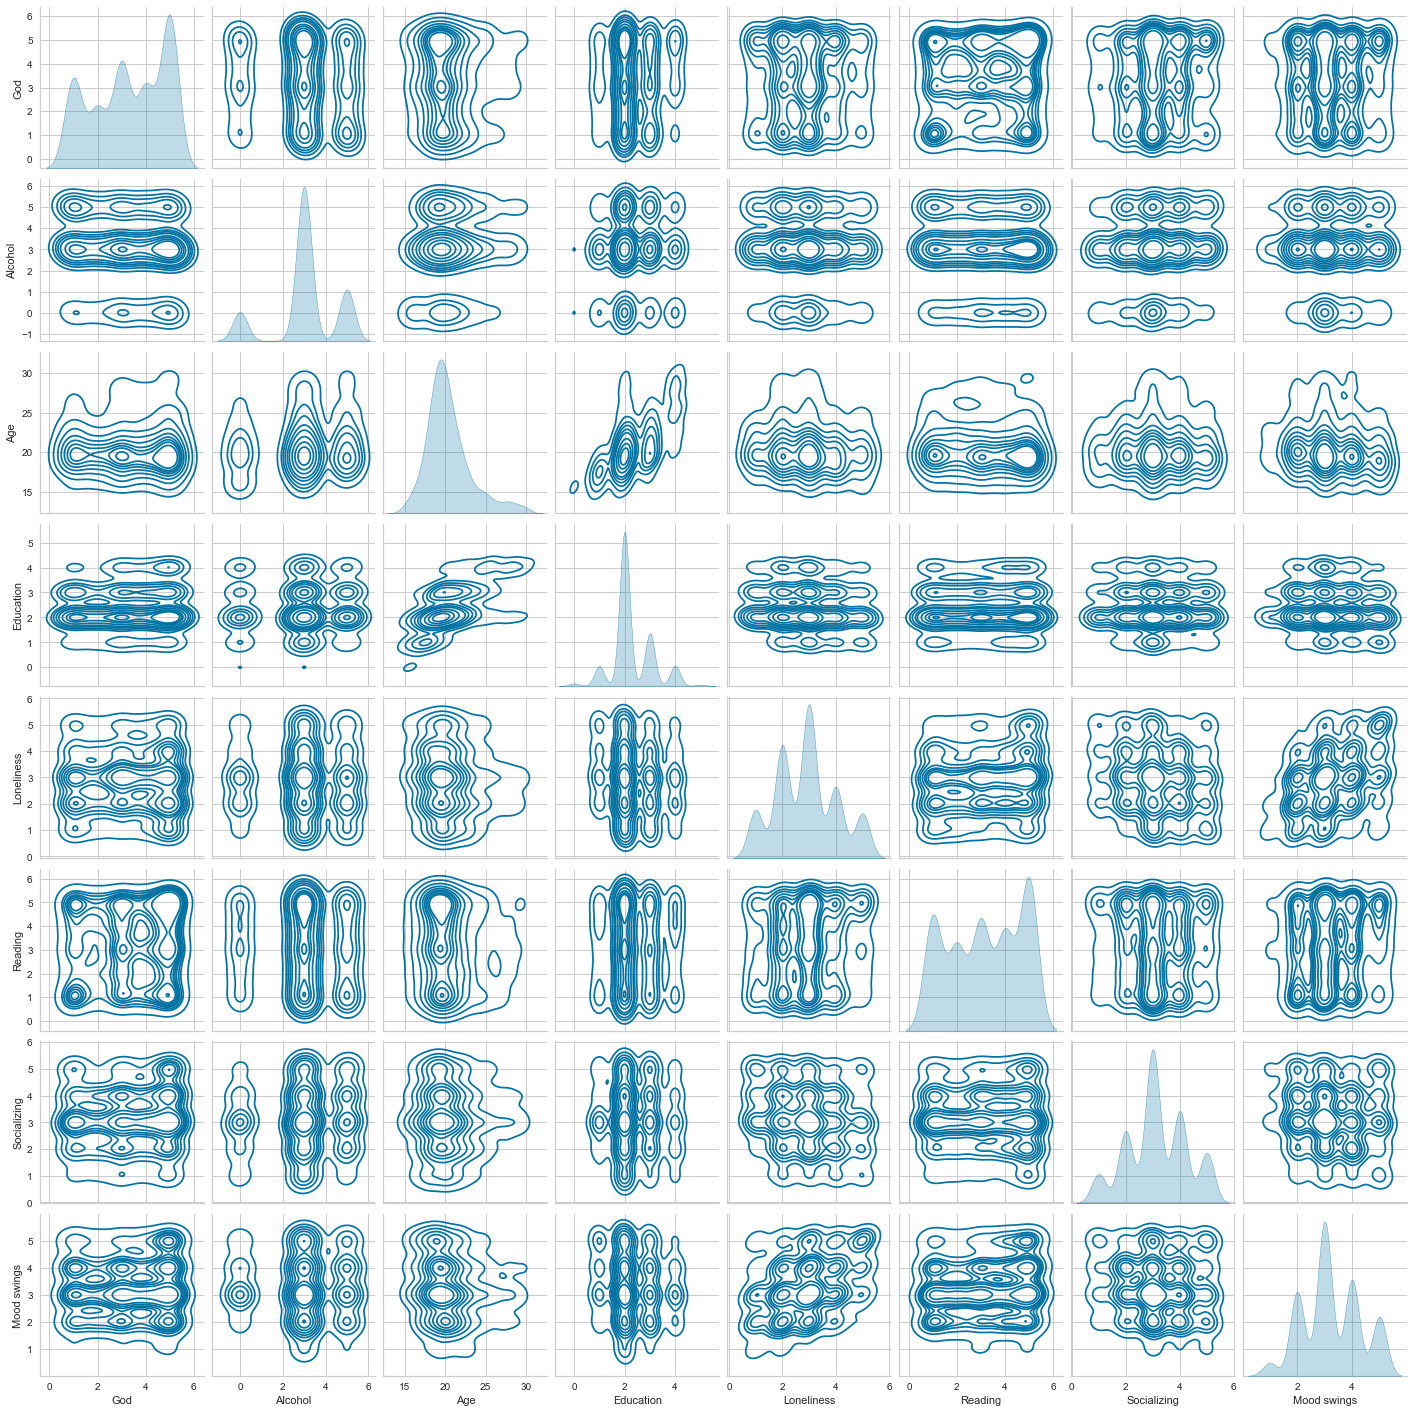

In [45]:
sns.pairplot(newData, kind="kde")

### Aglomerative Clustering

In [89]:
from sklearn.cluster import AgglomerativeClustering

best_score = 0.0
best_ac_labels = None

for k in range(2, 8):
    ac_model = AgglomerativeClustering(n_clusters=k, compute_distances=True)
    ac_labels = ac_model.fit_predict(newData)
    
    sil_score = silhouette_score(newData, ac_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_ac_labels = ac_labels
    
    print("Clusters: ", k)
    print(ac_labels)
    print("Silhouette score: ", silhouette_score(newData, ac_labels))
    print("Davies-Bouldin score: ", davies_bouldin_score(newData, ac_labels))
    print("------------------------------------------")

Clusters:  2
[0 0 0 ... 0 1 0]
Silhouette score:  0.39487436150212873
Davies-Bouldin score:  1.0025512017996625
------------------------------------------
Clusters:  3
[0 2 2 ... 0 1 0]
Silhouette score:  0.1434169510132839
Davies-Bouldin score:  1.931415705027889
------------------------------------------
Clusters:  4
[3 0 0 ... 3 1 3]
Silhouette score:  0.12712751030904554
Davies-Bouldin score:  1.8756517079933823
------------------------------------------
Clusters:  5
[3 4 2 ... 3 1 3]
Silhouette score:  0.12435547317131347
Davies-Bouldin score:  1.9061878860130108
------------------------------------------
Clusters:  6
[3 4 0 ... 3 1 3]
Silhouette score:  0.11913809291882681
Davies-Bouldin score:  1.8396673173777558
------------------------------------------
Clusters:  7
[1 4 3 ... 1 0 1]
Silhouette score:  0.10741409958640823
Davies-Bouldin score:  1.7131835991440523
------------------------------------------


### Gaussian Mixture Model

n clusters:  4
[0 0 1 ... 0 2 0]
Silhouette score:  0.17167689886414753
Davies-Bouldin score:  1.6189546360275742
------------------------------------------
n clusters:  5
[1 1 0 ... 1 2 1]
Silhouette score:  0.15437592770195255
Davies-Bouldin score:  1.6934754918417219
------------------------------------------
n clusters:  6
[2 2 1 ... 2 5 2]
Silhouette score:  0.14985203364701044
Davies-Bouldin score:  1.569560107463367
------------------------------------------
n clusters:  7
[2 2 0 ... 5 1 2]
Silhouette score:  0.13070389388077033
Davies-Bouldin score:  1.718173768418055
------------------------------------------
n clusters:  8
[5 5 1 ... 0 2 5]
Silhouette score:  0.1276044892418373
Davies-Bouldin score:  1.6940099185405466
------------------------------------------


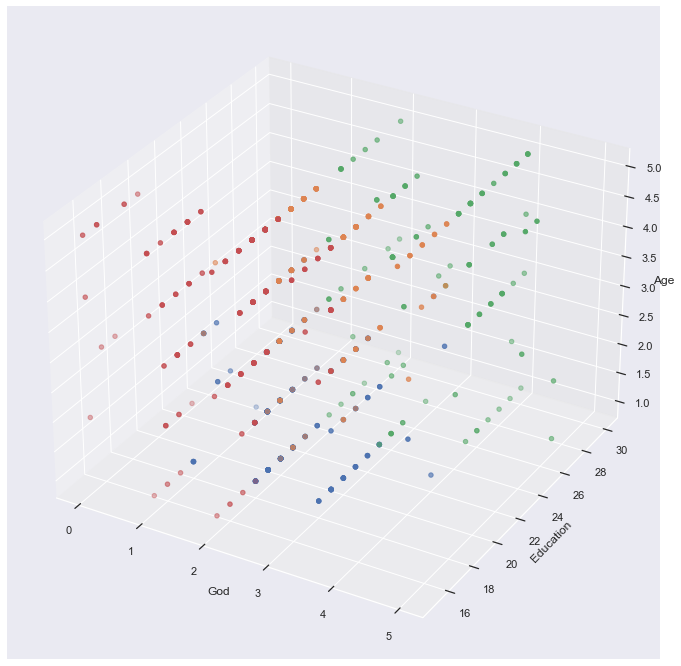

In [179]:
from sklearn import mixture

best_score = 0.0
best_gm_labels = None

for k in range(4, 9):
    gm_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(newData)
    gm_labels = gm_model.fit_predict(newData)

    sil_score = silhouette_score(newData, gm_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_gm_labels = gm_labels
    
    print("n clusters: ", k)
    print(gm_labels)
    print("Silhouette score: ", sil_score)
    print("Davies-Bouldin score: ", davies_bouldin_score(newData, gm_labels))
    print("------------------------------------------")

printClusters(newData, best_gm_labels, [0,3,2])
fig = px.scatter_3d(newData, x=newData.columns[0], y=newData.columns[3], z=newData.columns[2], color=best_gm_labels, symbol=best_gm_labels, height=700)
fig.show() 

### PCA

In [48]:
newData.drop(columns=["y_means"])

KeyError: "['y_means'] not found in axis"

In [180]:
newData.head()

God  Religion   Age  Education  History  Politics  Number of friends  \
0  1.0       1.0  20.0        3.0      1.0       1.0                  3   
1  1.0       1.0  19.0        3.0      1.0       4.0                  3   
2  5.0       5.0  20.0        2.0      1.0       1.0                  3   
3  4.0       4.0  22.0        3.0      4.0       5.0                  1   
4  5.0       4.0  20.0        2.0      3.0       3.0                  3   

   Fun with friends  
0               5.0  
1               4.0  
2               5.0  
3               2.0  
4               4.0

In [182]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
PCA_components = pca.fit_transform(newData)
principalComponents = pd.DataFrame(PCA_components)
principalComponents.head()

best_score = 0.0
best_gm_pca_labels = None

for k in range(4, 10):
    gm_pca_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(newData)
    gm_pca_labels = gm_pca_model.fit_predict(principalComponents)

    sil_score = silhouette_score(principalComponents, gm_pca_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_gm_pca_labels = gm_pca_labels
        
    print("n clusters: ", k)
    print(gm_pca_labels)
    print("Silhouette score: ", sil_score)
    print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, gm_pca_labels))
    print("------------------------------------------")
    

fig = px.scatter_3d(newData, x=newData.columns[0], y=newData.columns[2], z=newData.columns[3], color=best_gm_pca_labels, symbol=best_gm_pca_labels, height=700)
fig.show() 


n clusters:  4
[0 0 2 ... 0 1 0]
Silhouette score:  0.262412124895378
Davies-Bouldin score:  1.1566631651619848
------------------------------------------
n clusters:  5
[4 4 2 ... 4 1 4]
Silhouette score:  0.2400247145466169
Davies-Bouldin score:  1.1012043318225062
------------------------------------------
n clusters:  6
[5 5 1 ... 5 0 5]
Silhouette score:  0.24576908924771568
Davies-Bouldin score:  1.0736720622635316
------------------------------------------
n clusters:  7
[4 4 1 ... 4 0 4]
Silhouette score:  0.24738489741606412
Davies-Bouldin score:  1.1193822921482364
------------------------------------------
n clusters:  8
[4 4 5 ... 4 2 4]
Silhouette score:  0.2266577265533876
Davies-Bouldin score:  1.141926147397478
------------------------------------------
n clusters:  9
[7 7 1 ... 7 0 7]
Silhouette score:  0.25227241965102976
Davies-Bouldin score:  1.0723603704488465
------------------------------------------


## Hierarchical clustering

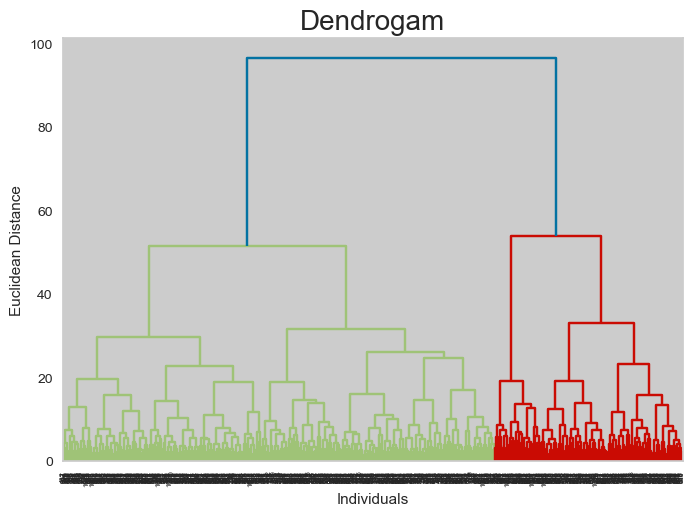

In [95]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(newData, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Individuals')
plt.ylabel('Euclidean Distance')
plt.show()

In [96]:
from sklearn.cluster import AgglomerativeClustering
#x=myData[['Science and technology','Religion','Fun with friends']]
x=newData
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean')
y_hc = hc.fit_predict(x)

In [97]:
silhouette_score(x,y_hc)

0.1314709710878038

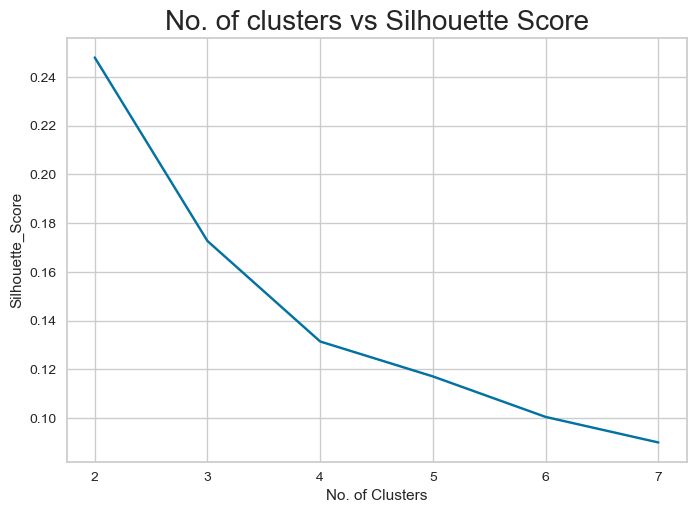

In [99]:
from sklearn.preprocessing import StandardScaler

#x=myData[['Science and technology', 'Religion', 'Fun with friends']]
x=newData

#scaler=StandardScaler()
#scaler.fit(x)
wcss = []
#x=scaler.transform(x)
for i in range(2, 8):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean')
    y_hc = hc.fit_predict(x)
    s=silhouette_score(x,y_hc)
    wcss.append(s)
plt.plot(range(2, 8), wcss)
plt.title('No. of clusters vs Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_Score')
plt.show()

### Evaluating Clustering Performance Using Advanced Techniques

In [100]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

print("Kmeans sillhouette: "+str(kmeans_silhouette))
print("Dbscan silhouette: "+str(dbscan_silhouette))

ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
print("ARI statistika kmeans: " +str(round(ari_kmeans, 2)))
print("Ari statistika dbscan: "+str(round(ari_dbscan, 2)))# Unlike the silhouette coefficient,
# the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

Kmeans sillhouette: 0.47
Dbscan silhouette: 0.38
ARI statistika kmeans: 0.3
Ari statistika dbscan: 1.0


In [64]:
myData.head()

Music  Slow songs or fast songs  Movies  History  Psychology  Politics  \
0    5.0                       3.0     5.0      1.0         5.0       1.0   
1    4.0                       4.0     5.0      1.0         3.0       4.0   
2    5.0                       5.0     5.0      1.0         2.0       1.0   
3    5.0                       3.0     5.0      4.0         4.0       5.0   
4    5.0                       3.0     5.0      3.0         2.0       3.0   

   Mathematics  Science and technology  Reading  Foreign languages  Religion  \
0          3.0                     4.0      3.0                5.0       1.0   
1          5.0                     3.0      4.0                5.0       1.0   
2          5.0                     2.0      5.0                5.0       5.0   
3          4.0                     3.0      5.0                4.0       4.0   
4          2.0                     3.0      5.0                3.0       4.0   

   Passive sport  Active sport  Fun with friends  Smoking  Alcohol  \
0            1.0           5.0               5.0      0.0      5.0   
1            1.0           1.0               4.0      0.0      5.0   
2            5.0           2.0               5.0      3.0      5.0   
3            1.0           1.0               2.0      5.0      5.0   
4            3.0           1.0               4.0      3.0      3.0   

   Writing notes  Thinking ahead  Keeping promises  Loss of interest  \
0            5.0             2.0               4.0               1.0   
1            4.0             4.0               4.0               3.0   
2            5.0             5.0               5.0               1.0   
3            4.0             3.0               4.0               5.0   
4            2.0             5.0               4.0               2.0   

   Friends versus money  Funniness  Fake  Empathy  Compassion to animals  \
0                   3.0        5.0   1.0      3.0                    5.0   
1                   4.0        3.0   2.0      2.0                    4.0   
2                   5.0        2.0   4.0      5.0                    4.0   
3                   2.0        1.0   1.0      3.0                    2.0   
4                   3.0        3.0   2.0      3.0                    3.0   

   Number of friends  Lying  Achievements  Happiness in life  \
0                  3    0.0           4.0                4.0   
1                  3    3.0           2.0                4.0   
2                  3    3.0           3.0                4.0   
3                  1    4.0           3.0                2.0   
4                  3    5.0           3.0                3.0   

   Interests or hobbies  Finances   Age  Number of siblings  Education  \
0                   3.0       3.0  20.0                 1.0        3.0   
1                   3.0       3.0  19.0                 2.0        3.0   
2                   5.0       2.0  20.0                 2.0        2.0   
3                   4.0       2.0  22.0                 1.0        3.0   
4                   3.0       4.0  20.0                 1.0        2.0   

   y_means  
0        3  
1        1  
2        0  
3        4  
4        0

### Pipeline

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [99]:
myColumns=myData.columns
print(myColumns)

Index(['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology',
       'Politics', 'Mathematics', 'Science and technology', 'Reading',
       'Foreign languages', 'Religion', 'Passive sport', 'Active sport',
       'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes',
       'Thinking ahead', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Empathy',
       'Compassion to animals', 'God', 'Number of friends', 'Lying',
       'Achievements', 'Happiness in life', 'Interests or hobbies', 'Finances',
       'Age', 'Number of siblings', 'Education', 'Village - town', 'y_means'],
      dtype='object')


In [100]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(myColumns)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)
true_labels[:5]

array([22, 31, 21, 15, 27])

In [ ]:
from sklearn.decomposition import PCA


preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

clusterer = Pipeline(
       [
          ("kmeans", KMeans(n_clusters=n_clusters, init="k-means++", n_init=50, max_iter=500, random_state=42,
          ),
          ),
       ]
   )
pipe = Pipeline(
     [
         ("preprocessor", preprocessor),
         ("clusterer", clusterer)
     ]
    )
pipe.fit(myData)

preprocessed_data = pipe["preprocessor"].transform(myData)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
print("silhouette score: "+str(silhouette_score(preprocessed_data, predicted_labels)))

print(predicted_labels.shape)
print(true_labels.shape)
print("adjusted rand score: "+str(adjusted_rand_score(true_labels, predicted_labels)))

## What kind of person are you?

In [102]:
Science=input("Input your science score 1-5: ")
Religion=input("Input your religion score 1-5: ")
FWF=input("Input your fun with friends score 1-5: ")

In [146]:
Religion=input("Input your religion score 1-5: ")

In [147]:
FWF=input("Input your fun with friends score 1-5: ")

In [185]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30,random_state=2)
x=newData
km.fit(x)
y_means=km.predict(x)
cent = km.cluster_centers_
newData['y_means']=y_means
newData.groupby('y_means').mean()
kmeans=pd.DataFrame(y_means)

C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_11080\2997850816.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [186]:
newData.head()

God  Religion   Age  Education  History  Politics  Number of friends  \
0  1.0       1.0  20.0        3.0      1.0       1.0                  3   
1  1.0       1.0  19.0        3.0      1.0       4.0                  3   
2  5.0       5.0  20.0        2.0      1.0       1.0                  3   
3  4.0       4.0  22.0        3.0      4.0       5.0                  1   
4  5.0       4.0  20.0        2.0      3.0       3.0                  3   

   Fun with friends  y_means  
0               5.0        0  
1               4.0        0  
2               5.0        3  
3               2.0        3  
4               4.0        3

### Little fun never killed nobody

In [60]:
import tkinter as tk
#Science=input("Input your science score 1-5: ")
#Religion=input("Input your religion score 1-5: ")
#FWF=input("Input your fun with friends score 1-5: ")
def function(Science, Religion, FWF):
      global pom
      test=[[Science, Religion, FWF]]
      y_means=km.predict(test)
      print("Group: "+str(y_means[0]))
      if y_means[0]==0:
            pom="You are identified to be a good person but a little confused!"
            #print("You are identified to be a good person but a little confused!")
      elif y_means[0]==1:
            pom="You are identified to be a likeable person but manipulative and not heartfelt!"
            #print("You are identified to be a likeable person but manipulative and not heartfelt!")
      elif y_means[0]==2:
            pom="You are identified to be an valuable person and student!"
            #print("You are identified to be an valuable person and student!")
      elif y_means[0]==3:
            pom="You are identified to be a atheist but smart!"
            #print("You are identified to be a atheist but smart!")
      else:
            pom="You are identified to be an outcast!"
            #print("You are identified to be an outcast!")
#function(Science, Religion, FWF)
#print(pom)
import tkinter as tk
from tkinter import messagebox
import csv

def on_submit():
    if not all(var.get() for var in vars):
        messagebox.showerror("Error", "Not all radio buttons are selected!")
    else:
        Science = science_var.get()
        Religion = religion_var.get()
        FWF = fwf_var.get()
        function(Science, Religion, FWF)
        result_label.config(text=pom)
        if first_name_entry.get() and last_name_entry.get():
            save_to_csv(first_name_entry.get(), last_name_entry.get(), Science, Religion, FWF, pom)

def save_to_csv(first_name, last_name, science, religion, fwf, result):
    with open('results.csv', mode='a') as csv_file:
        fieldnames = ['First Name', 'Last Name', 'Science', 'Religion', 'FWF', 'Result']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writerow({'First Name': first_name, 'Last Name': last_name, 'Science': science, 'Religion': religion, 'FWF': fwf, 'Result': result})

root = tk.Tk()
root.title("User Input")
root.geometry("500x500")

first_name_label = tk.Label(root, text="First Name: ")
first_name_label.grid(row=0, column=0, sticky="W", pady=10)

first_name_entry = tk.Entry(root)
first_name_entry.grid(row=0, column=1)

last_name_label = tk.Label(root, text="Last Name: ")
last_name_label.grid(row=1, column=0, sticky="W", pady=10)

last_name_entry = tk.Entry(root)
last_name_entry.grid(row=1, column=1)

science_label = tk.Label(root, text="Select Science: ")
science_label.grid(row=2, column=0, sticky="W", pady=10)

science_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=science_var, value=i).grid(row=3, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

religion_label = tk.Label(root, text="Select Religion: ")
religion_label.grid(row=4, column=0, sticky="W", pady=10)

religion_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=religion_var, value=i).grid(row=5, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

fwf_label = tk.Label(root, text="Select FWF: ")
fwf_label.grid(row=6, column=0, sticky="W", pady=10)

fwf_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=fwf_var, value=i).grid(row=7, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

vars = [science_var, religion_var, fwf_var]

submit_button = tk.Button(root, text="Submit", bg="blue", command=on_submit)
submit_button.grid(row=8, column=2)

result_label = tk.Label(root, text="", font=("Arial", 14))
result_label.grid(row=9, column=0, columnspan=5, pady=10)
result_label.config(text="Results")
result_label.config(fg="blue", font=("Arial", 20, "bold"))
result_label.config(anchor="center")
result_label.config(width=20, height=4, wraplength=400)
root.grid_columnconfigure(0, weight=1)
root.grid_rowconfigure(9, weight=1)

close_button = tk.Button(root, text="Close", bg="red", command=root.destroy)
close_button.grid(row=10, column=2)

root.mainloop()


#Science=input("Input your science score 1-5: ")
#Religion=input("Input your religion score 1-5: ")
#FWF=input("Input your fun with friends score 1-5: ")


c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Nikola Petrovic\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_11080\3985404087.py", line 41, in on_submit
    function(Science, Religion, FWF)
  File "C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_11080\3985404087.py", line 8, in function
    y_means=km.predict(test)
  File "c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 1330, in predict
    X = self._check_test_data(X)
  File "c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 1007, in _check_test_data
    X = self._validate_data(
  File "c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\base.py"